# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import warnings
import os
from english_text_normalization import text_normalization
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(42)

# Ignore Warnings

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [3]:
Corpus = open("Frankenstein.txt").read().lower().split("\n")
Corpus = [line.strip() for line in Corpus if line.strip()]
Corpus =  list(map(text_normalization, Corpus))
len(Corpus)

6360

# Preprocessing Data For Deep Learning Model

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(Corpus)
all_words = len(tokenizer.word_index) + 1
all_words

7211

# Generate Input Sequences

In [5]:
input_sequence_ = []
for line in Corpus:
    token = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token)):
        n_grams = token[:i+1]
        input_sequence_.append(n_grams)
        
max_length =  max([len(x) for x in input_sequence_])
input_sequence_ = np.array(tf.keras.utils.pad_sequences(input_sequence_, maxlen= max_length, padding='pre'))

In [6]:
max_length

18

# Generate Train And Label Data For Model

In [7]:
train, label = input_sequence_[:,:-1], input_sequence_[:,-1]

# Convert Label Data

In [8]:
label = tf.keras.utils.to_categorical(label, num_classes=all_words)

# Deep Learning Models

In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    mode = 'min',
    restore_best_weights=True,
)

**1-LSTM**

In [10]:
lstm_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='English_LSTM.h5',
    monitor='loss',
    mode='min',
    save_best_only=True)

In [14]:
LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.LSTM(256, return_sequences=True),
                tf.keras.layers.LSTM(128, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])     

In [15]:
LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [16]:
with tf.device('gpu'):
    history = LSTM.fit(train, label, epochs=150, callbacks=[early_stop, lstm_checkpoint])

Epoch 1/150
2143/2143 [==============================] - 57s 25ms/step - loss: 6.5136 - accuracy: 0.0672
Epoch 2/150
2143/2143 [==============================] - 51s 24ms/step - loss: 5.9316 - accuracy: 0.1018
Epoch 3/150
2143/2143 [==============================] - 50s 23ms/step - loss: 5.6003 - accuracy: 0.1290
Epoch 4/150
2143/2143 [==============================] - 50s 24ms/step - loss: 5.3664 - accuracy: 0.1443
Epoch 5/150
2143/2143 [==============================] - 49s 23ms/step - loss: 5.1627 - accuracy: 0.1515
Epoch 6/150
2143/2143 [==============================] - 48s 22ms/step - loss: 4.9678 - accuracy: 0.1609
Epoch 7/150
2143/2143 [==============================] - 48s 22ms/step - loss: 4.7882 - accuracy: 0.1688
Epoch 8/150
2143/2143 [==============================] - 53s 25ms/step - loss: 4.6129 - accuracy: 0.1758
Epoch 9/150
2143/2143 [==============================] - 54s 25ms/step - loss: 4.4471 - accuracy: 0.1830
Epoch 10/150
2143/2143 [==============================]

In [17]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

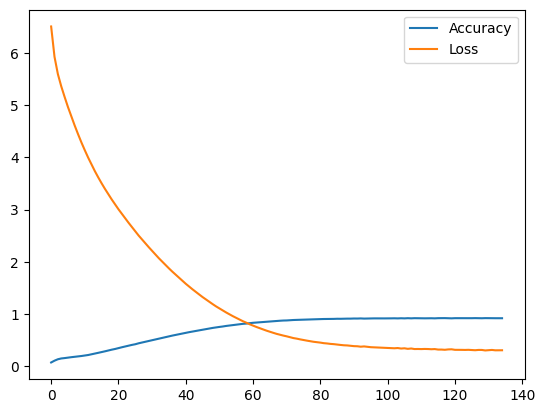

In [18]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**2-Bidirectional LSTM**

In [19]:
bidirectional_lstm_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='English_Bidirectional_LSTM.h5',
    monitor='loss',
    mode='min',
    save_best_only=True)

In [23]:
Bidirectional_LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [24]:
Bidirectional_LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [25]:
with tf.device('gpu'):
    history = Bidirectional_LSTM.fit(train, label, epochs=150, callbacks=[early_stop, bidirectional_lstm_checkpoint])

Epoch 1/150
2143/2143 [==============================] - 62s 27ms/step - loss: 6.3661 - accuracy: 0.0811
Epoch 2/150
2143/2143 [==============================] - 56s 26ms/step - loss: 5.7229 - accuracy: 0.1252
Epoch 3/150
2143/2143 [==============================] - 52s 24ms/step - loss: 5.3600 - accuracy: 0.1501
Epoch 4/150
2143/2143 [==============================] - 56s 26ms/step - loss: 5.0572 - accuracy: 0.1678
Epoch 5/150
2143/2143 [==============================] - 54s 25ms/step - loss: 4.7649 - accuracy: 0.1829
Epoch 6/150
2143/2143 [==============================] - 56s 26ms/step - loss: 4.4795 - accuracy: 0.1988
Epoch 7/150
2143/2143 [==============================] - 52s 24ms/step - loss: 4.1938 - accuracy: 0.2196
Epoch 8/150
2143/2143 [==============================] - 52s 24ms/step - loss: 3.9118 - accuracy: 0.2456
Epoch 9/150
2143/2143 [==============================] - 51s 24ms/step - loss: 3.6324 - accuracy: 0.2804
Epoch 10/150
2143/2143 [==============================]

In [26]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

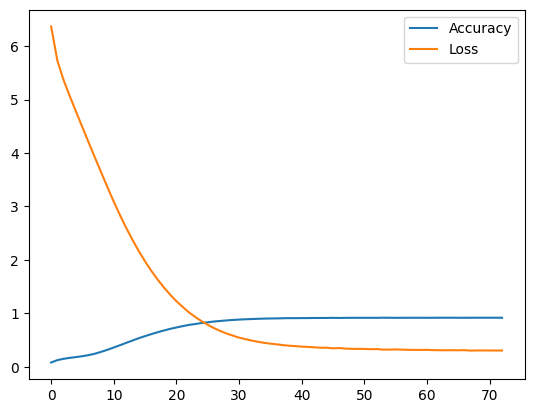

In [27]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**3-GRU**

In [28]:
gru_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='English_GRU.h5',
    monitor='loss',
    mode='min',
    save_best_only=True)

In [29]:
GRU = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.GRU(128, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [30]:
GRU.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [31]:
with tf.device('gpu'):
    history = GRU.fit(train, label, epochs=150, callbacks=[early_stop, gru_checkpoint])

Epoch 1/150
2143/2143 [==============================] - 40s 18ms/step - loss: 6.3236 - accuracy: 0.0905
Epoch 2/150
2143/2143 [==============================] - 37s 17ms/step - loss: 5.5666 - accuracy: 0.1374
Epoch 3/150
2143/2143 [==============================] - 37s 17ms/step - loss: 5.1586 - accuracy: 0.1617
Epoch 4/150
2143/2143 [==============================] - 37s 17ms/step - loss: 4.7919 - accuracy: 0.1815
Epoch 5/150
2143/2143 [==============================] - 37s 17ms/step - loss: 4.4340 - accuracy: 0.2009
Epoch 6/150
2143/2143 [==============================] - 37s 17ms/step - loss: 4.0944 - accuracy: 0.2273
Epoch 7/150
2143/2143 [==============================] - 37s 17ms/step - loss: 3.7662 - accuracy: 0.2607
Epoch 8/150
2143/2143 [==============================] - 37s 17ms/step - loss: 3.4571 - accuracy: 0.3020
Epoch 9/150
2143/2143 [==============================] - 37s 17ms/step - loss: 3.1664 - accuracy: 0.3473
Epoch 10/150
2143/2143 [==============================]

In [32]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

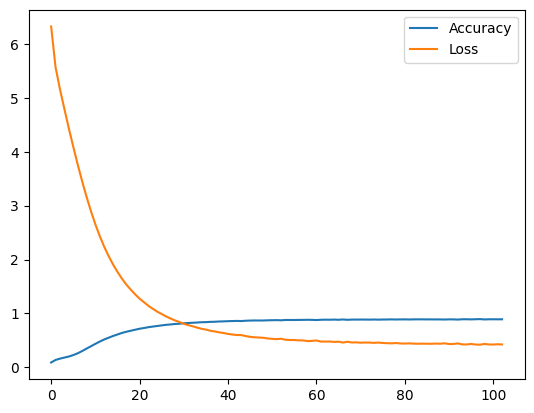

In [33]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

# Testing The Model

**1-LSTM**

In [37]:
text = "We could"
number_of_words = 10
  
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

We could not
We could not deny
We could not deny her
We could not deny her food
We could not deny her food that
We could not deny her food that a
We could not deny her food that a man
We could not deny her food that a man has
We could not deny her food that a man has so
We could not deny her food that a man has so good
 
Full Generated Text: We could not deny her food that a man has so good


**2-Bidirectional LSTM**

In [38]:
text = "We could"
number_of_words = 10
  
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = Bidirectional_LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word
    print(text)
print(" ")
print("Full Generated Text:", text) 

We could not
We could not collect
We could not collect the
We could not collect the courage
We could not collect the courage to
We could not collect the courage to recommence
We could not collect the courage to recommence my
We could not collect the courage to recommence my work
We could not collect the courage to recommence my work i
We could not collect the courage to recommence my work i feared
 
Full Generated Text: We could not collect the courage to recommence my work i feared


**3-GRU**

In [39]:
text = "We could"
number_of_words = 12
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = GRU.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

We could have
We could have relieve
We could have relieve me
We could have relieve me from
We could have relieve me from the
We could have relieve me from the fresh
We could have relieve me from the fresh history
We could have relieve me from the fresh history from
We could have relieve me from the fresh history from which
We could have relieve me from the fresh history from which they
We could have relieve me from the fresh history from which they remained
We could have relieve me from the fresh history from which they remained near
 
Full Generated Text: We could have relieve me from the fresh history from which they remained near


# Save The Tokenizer

In [40]:
import pickle
with open('english_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)